In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

plt.style.use('seaborn-v0_8-colorblind')
sns.set_style("whitegrid")
# sns.set_style("ticks")
sns.set_context("paper", font_scale=1.3)

In [2]:
# Read the CSV data
df = pd.read_csv('palluck_et_al_analysis_results.csv')
df

,post_mean,post_median,post_std,q025,q975,estimand,model,method
0,0.160045,0.158033,0.022117,0.122290,0.208037,stoch_30,Observed,Observed
1,0.171696,0.166163,0.037262,0.113297,0.258209,stoch_50,Observed,Observed
2,0.183216,0.172356,0.054418,0.104626,0.316368,stoch_70,Observed,Observed
3,0.158009,0.153512,0.026907,0.118839,0.224012,stoch_30,Noisy (single),Plug-in
4,0.173060,0.161526,0.044314,0.119323,0.297170,stoch_50,Noisy (single),Plug-in
5,0.188918,0.170597,0.061175,0.120432,0.367683,stoch_70,Noisy (single),Plug-in
6,0.322091,0.325898,0.073208,0.175543,0.455471,stoch_30,Noisy (repeated),Plug-in
7,0.450550,0.470321,0.101537,0.203028,0.602394,stoch_50,Noisy (repeated),Plug-in
8,0.545372,0.572156,0.113862,0.232745,0.695551,stoch_70,Noisy (repeated),Plug-in
9,0.200728,0.193591,0.047530,0.126835,0.310357,stoch_30,Multi-layer,Plug-in


In [3]:
df['model'].unique()

array(['Observed', 'Noisy (single)', 'Noisy (repeated)', 'Multi-layer'],
      dtype=object)

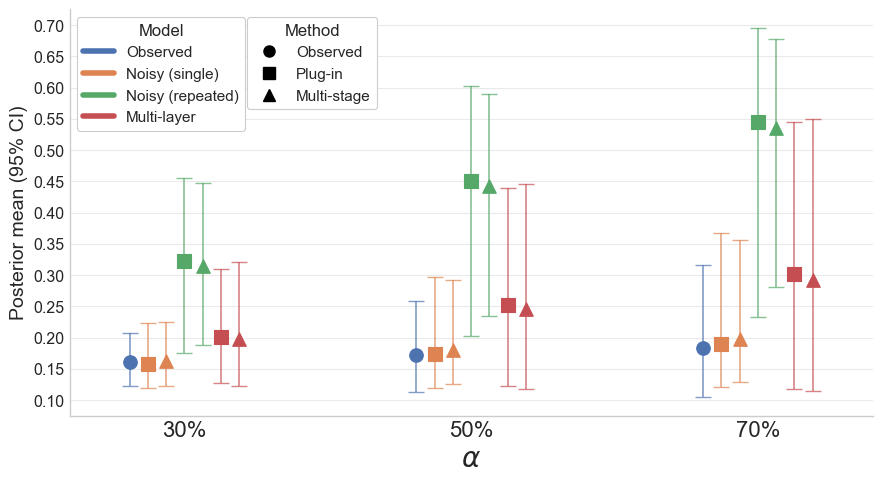

In [19]:

# plot results

# Set the order of estimands
estimand_order = ['stoch_30', 'stoch_50', 'stoch_70']

# Set up the plot
fig, ax = plt.subplots(figsize=(9, 5))

# Color palette for models
# models = df['model'].unique()
models = ['Observed', 'Noisy (single)', 'Noisy (repeated)', 'Multi-layer']
color_palette = sns.color_palette("deep", n_colors=len(models))
color_dict = dict(zip(models, color_palette))

# Marker styles for methods
methods = df['method'].unique()
# marker_dict = {'observed': 'o', 'onestage': 's', 'multistage': '^'}
marker_dict = {'Observed': 'o', 'Plug-in': 's', 'Multi-stage': '^'}

# Calculate the number of unique model-method combinations
n_combinations = len(models) * (len(methods)) - 1 
# Calculate dodge offset
dodge = np.linspace(-0.35, 0.35, n_combinations + 1)

dodge_index = 0
center_x = None
for i, model in enumerate(models):
    for j, method in enumerate(methods):
        if model == 'Observed' and method != 'Observed':
            continue
        data = df[(df['model'] == model) & (df['method'] == method) & (df['estimand'].isin(estimand_order))].sort_values('estimand')
        
        if not data.empty:
            # x = np.arange(len(estimand_order)) + dodge[i]
            # dodge_index = i * (len(methods) - 1) + (j if j > 0 else 0)
            x = np.arange(len(estimand_order)) + dodge[dodge_index]
            # x_positions.extend(x)
            # Plot error bars
            ax.errorbar(x, data['post_mean'],
                         yerr=[data['post_mean'] - data['q025'], data['q975'] - data['post_mean']],
                         # yerr=[data['post_mean'] - data['q025'], data['q975'] - data['post_mean']],
                         fmt='none',  # Don't plot markers here
                         ecolor=color_dict[model],
                         capsize=6,
                         alpha=0.7)
    
            # Plot points
            ax.scatter(x, data['post_mean'],
                        color=color_dict[model],
                        marker=marker_dict[method],
                        s=95,
                        zorder=10)  # Ensure points are on top
            
            if model == 'Noisy (repeated)' and method == 'Plug-in':
                center_x = x
                
            dodge_index += 1

# Add ticks to both axes
# Add ticks to both axes
ax.tick_params(axis='both', which='both', direction='in', length=5, width=1, color='black')
ax.tick_params(axis='both', which='major', direction='in', length=7, width=1.5, color='black')

ax.set_xlabel(r'$\alpha$', fontsize=20)
ax.set_ylabel('Posterior mean (95% CI)', fontsize=14)
ax.set_yticks(np.arange(0.1, 0.75, 0.05))
# ax.set_ylim(())
# ax.set_title('Posterior Estimates by Model and Method', fontsize=14)

# Set x-ticks to be '30%', '50%', '70%'
# ax.set_xticks(range(len(estimand_order)))
# ax.set_xticklabels(['30%', '50%', '70%'], fontsize=14)
# Adjust x-limits to center the ticks
ax.set_xticks(center_x)
ax.set_xticklabels(['30%', '50%', '70%'], fontsize=16)

# Set x-limits to show all points
ax.set_xlim(np.min(center_x) - 0.4, np.max(center_x) + 0.4)

# Create custom legends
model_legend = [Line2D([0], [0], color=color, lw=4, label=model)
                for model, color in color_dict.items()]
method_legend = [Line2D([0], [0], color='black', marker=marker, linestyle='None',
                        markersize=8, label=method)
                 for method, marker in marker_dict.items()]

# Add legends to the plot
model_leg = ax.legend(handles=model_legend, title='Model', loc='upper left',
                      bbox_to_anchor=(0, 1), fontsize=11, title_fontsize=12,
                      frameon=True, fancybox=True, framealpha=1)

# Add the method legend next to the model legend
ax.add_artist(model_leg)  # Ensure the model legend is not overwritten
ax.legend(handles=method_legend, title='Method', loc='upper left',
          bbox_to_anchor=(0.212, 1), fontsize=11, title_fontsize=12,
          frameon=True, fancybox=True, framealpha=1)

# Remove top and right spines
sns.despine()

# Adjust layout
plt.tight_layout()

plt.rcParams['grid.alpha'] = 0.4
ax.xaxis.grid(False)

# Save the figure
plt.savefig('palluck_analysis_results.png', dpi=1000, bbox_inches='tight')

# Display the plot
plt.show()